<h1 align=center><font color=red>TP1 Traitement du signal</font></h1>
<h2 align=center>Ibrahim ALAME</h2>
<h3 align=center>28/03/2022</h3>

La transformation de Fourier discrète (TFD), outil mathématique, sert à traiter un signal numérique. Elle constitue un équivalent discret de la transformation de Fourier (continue) utilisée pour traiter un signal analogique:

Soit $(s_n)$ un signal discret périodique de période $N$. Sa transformation (TFD) est un signal discret périodique de même période $N$ défini par:
$$
{\displaystyle S_p=\frac 1N\sum _{n=0}^{N-1}s_n\mathrm {e} ^{-2\mathrm {i} \pi p{\frac {n}{N}}}\qquad {\text{pour}}\qquad p\in\mathbb{Z}}
$$
Sa transformation inverse est donnée par
$$
{\displaystyle s(n)=\sum _{p=0}^{N-1}S_p\mathrm {e} ^{2\mathrm {i} \pi n{\frac {p}{N}}}\qquad {\text{pour}}\qquad n\in \mathbb{Z}}
$$


La transformation de Fourier rapide <B> fft</B>  est un algorithme particulier de calcul de la transformation de Fourier discrète:

$$\mbox {fft}(s)[p]=\sum _{n=0}^{N-1}s_n\mathrm {e} ^{-2\mathrm {i} \pi p{\frac {n}{N}}}\qquad {\text{pour}}\qquad 0\leq p< N
$$
Sa transformation inverse <B>ifft</B> est donnée par:
$$
\mbox {ifft}(S)[n]=\frac 1N\sum _{p=0}^{N-1}S_p\mathrm {e} ^{2\mathrm {i} \pi n{\frac {p}{N}}}\qquad {\text{pour}}\qquad 0\leq n< N
$$
 
 Nous avons alors 
$$ S= \frac 1N\times \mbox {fft}(s) \quad\mbox{ et }\quad s= N\times \mbox {ifft}(S) $$
 
 ou bien 
$$ N\times S= \mbox {fft}(s) \quad\mbox{ et }\quad s= \mbox {ifft}(N\times S) $$

En python:
<ul>
<li> La fonction <B>fft(signal)</B> du paquetage <B>numpy.fft</B> renvoie à un coefficient de normalisation $\frac 1N$ près, la transformée de Fourier discrète d'un signal à une dimension éventuellement complexe. La fonction abs de <B>numpy</B> renvoie le module d'un tableau de complexes. Sa réciproque à un coefficient multiplicatif $N$ près est la fonction  <B>ifft(signal)</B> du mêm paquetage <B>numpy.fft</B>.
<li>  La fonction <B>fftfreq(N, d)</B> de la bibliothèque <B>numpy.fft</B> renvoie un tableau contenant les fréquences associées à la transformée de Fourier pour un signal contenant $N$ échantillons espacés d'un intervalle $d$($d$ est la période d'échantillonnage noté $T_e$). 
<li>  La fonction <B>fftshift(X)</B> de <B>numpy.fft</B> associe à la restriction $X_{/[0,N-1]}$ d'un signal $N$-périodique, la restriction $X_{/[-\frac N2,\frac N2-1]}$ du même signal $X$.
</ul>

# Transformation de Fourier discrète (TFD)
Soit $x=(x_n)$ un signal 4-périodique qui coïncide sur l'intervalle $[0,3]$ avec la liste $[1,1,0,1]$.
<ol>
<li> Tracer $x$ sur $[-10,10]$.

</ol>

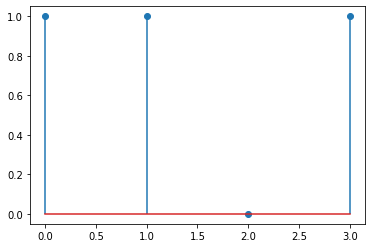

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

t=np.arange(4)
x=[1,1,0,1]
plt.stem(t,x)
plt.show()

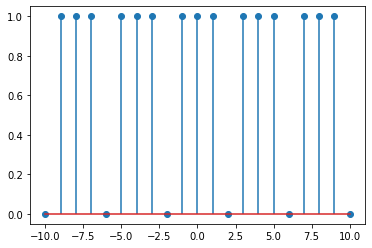

In [ ]:
N=4
t=np.arange(-2,2,1)
x=[1,1,0,1]
t=range(-10,11)
plt.stem(t,[x[k % N] for k in t])
plt.show()

<ol start=2>
<li> Calculer analytiquement sa transformée de Fourier discrète $X$.
</ol>

On a 
$$X_p=\frac 1N\sum_{n=0}^{N-1}x_ne^{-2 i \pi p\frac{n}{N}} =\frac 14\sum_{n=0}^{3}x_ne^{-2 i \pi p\frac{n}{4}} =\frac 14\sum_{n=0}^{3}x_n\omega^{-pn} \quad \mbox{ où }\quad \omega =e^{\frac{2 i \pi }{4}} =i $$
$$X_0=\frac 14\sum_{n=0}^{3}x_n=\frac 34$$
$$X_1=\frac 14\sum_{n=0}^{3}x_ni^{-n}=\frac 14(1-i+0+i)=\frac 14$$
$$X_2=\frac 14\sum_{n=0}^{3}x_ni^{-2n}=\frac 14\sum_{n=0}^{3}x_n(-1)^{n}=\frac 14(1-1+0-1)=-\frac 14$$
$$X_3=\frac 14\sum_{n=0}^{3}x_ni^{-3n}=\frac 14\sum_{n=0}^{3}x_ni^{n}=\frac 14(1+i+0-i)=\frac 14$$
Donc $X$ coïncide sur l'intervalle $[0,3]$ avec la liste $[\frac 34,\frac 14,-\frac 14,\frac 14]$.

<ol start=2>
<li> Calculer python sa transformée de Fourier discrète $X$.
</ol>

In [ ]:
X = np.fft.fft(x)/N
print("X=",X)

X= [ 0.75+0.j  0.25+0.j -0.25+0.j  0.25+0.j]


<ol start=3>
<li> Calculer par la formule de la définition puis par python $\mathcal{F}^{-1}(X)$.
</ol>

On a $$x_n=\sum_{p=0}^{N-1}X_pe^{2 i \pi n\frac{p}{N}} = \sum_{p=0}^{3}X_pe^{2 i \pi p\frac{n}{4}} =\sum_{n=0}^{3}X_pi^{pn} $$
$$X_0=\sum_{p=0}^{3}X_p=1$$
$$X_1=\sum_{p=0}^{3}X_pi^{p}=(\frac 34+\frac 14i+\frac 14-\frac 14i)=1$$
$$X_2=\sum_{p=0}^{3}x_pi^{2p}=\sum_{n=0}^{3}X_p(-1)^{p}=(\frac 34-\frac 14-\frac 14-\frac 14)=0$$
$$X_3=\sum_{p=0}^{3}x_pi^{3p}=\sum_{p=0}^{3}X_p(-i)^{p}=(\frac 34-\frac 14i+\frac 14+\frac 14i)=1$$
Donc $\mathcal{F}^{-1}(X)$ coïncide bien sur l'intervalle $[0,3]$ avec la liste $[1,1,0,1]$.

In [ ]:
xprim = np.fft.ifft(X)*N
print("xp=",xprim)

xp= [1.+0.j 1.+0.j 0.+0.j 1.+0.j]


<ol start=4>
<li> Tracer $X$ sur un intervalle de fréquence convenable.
</ol>

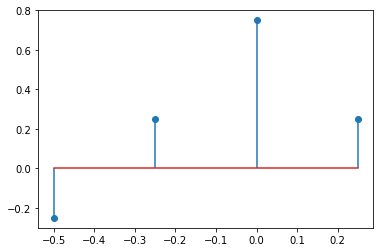

In [ ]:
f=np.fft.fftfreq(4,1)
plt.stem(f,np.real(X))
plt.show()

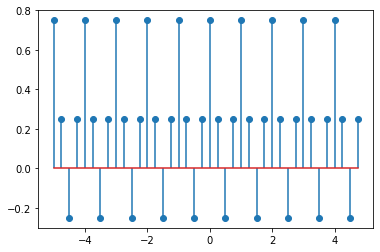

In [ ]:
# On peut aussi représenter le spectre X sur un intervalle plus large en complétant par périodicité:
freq=np.arange(-5,5,1/4)
n=len(freq)
plt.stem(freq,[np.real(X[k % N]) for k in range(-n//2,n//2)])
plt.show()

<ol start=5>
<li> Soit $y=(y_n)$ un signal défini par $y_n=x_{n-1}$ pour tout $n\in \mathbb{Z}$. Calculer par trois méthodes le spectre $Y=\mathcal{F}(y)$ transformation de Fourier de $y$.
</ol>

Première méthode par la formule de définition:

On a 
$$Y_p=\frac 1N\sum_{n=0}^{N-1}y_ne^{-2 i \pi p\frac{n}{N}} =\frac 14\sum_{n=0}^{3}y_ne^{-2 i \pi p\frac{n}{4}} =\frac 14\sum_{n=0}^{3}y_ni^{-pn} $$
$$Y_0=\frac 14\sum_{n=0}^{3}y_n=\frac 34$$
$$Y_1=\frac 14\sum_{n=0}^{3}y_ni^{-n}=\frac 14(1-i-1+0)=-\frac i4$$
$$X_2=\frac 14\sum_{n=0}^{3}y_ni^{-2n}=\frac 14\sum_{n=0}^{3}y_n(-1)^{n}=\frac 14(1-1+1+0)=-\frac 14$$
$$X_3=\frac 14\sum_{n=0}^{3}x_ni^{-3n}=\frac 14\sum_{n=0}^{3}x_ni^{n}=\frac 14(1+i-1+0)=\frac i4$$
Donc $X$ coïncide sur l'intervalle $[0,3]$ avec la liste $[\frac 34,-\frac i4,-\frac 14,\frac i4]$.

In [ ]:
# Deuxième méthode par fft
y=[1,1,1,0]
Y = np.fft.fft(y)/N
print("Y=",Y)

Y= [0.75+0.j   0.  -0.25j 0.25+0.j   0.  +0.25j]


Troisième méthode: On applique le théorème
$$ \mathcal{F}(Y)=e^{-2i\pi\frac pN}\mathcal{F}(X) \Longrightarrow Y_p=i^{-p} X_p$$

$$Y_0=X_0=\frac 34$$
$$Y_1=-iX_1=-\frac i4$$
$$Y_2=-X_2=\frac 14$$
$$Y_3=iX_3=\frac i4$$

<ol start=6>
<li> Tracer sur deux graphiques $y$ et $Y$.
</ol>

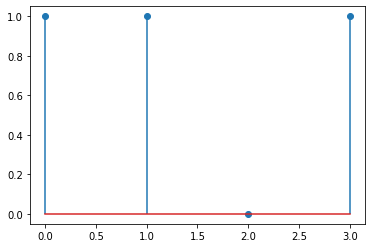

In [ ]:
t=np.arange(4)
y=[1,1,0,1]
plt.stem(t,y)
plt.show()

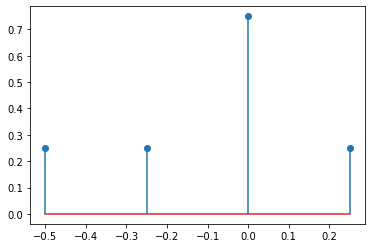

In [ ]:
f=np.fft.fftfreq(4,1)
plt.stem(f,np.abs(Y))
plt.show()

# Transformation de Fourier
## Calcul analytique
Soit $x$ le signal continu défini par $x(t)=e^{-|t|}$.
<ol>
<li> Montrer que la transformation de Fourier de $x$ s'écrit pour $f\in\mathbb{R}$: $ \hat x(f)=\frac{2}{1+4\pi^2f^2}$
</ol>

On a par définition :

$$X(f)=\int_{-\infty}^{\infty}e^{-|t|}e^{-2i\pi f t}\, d t=\int_{-\infty}^{\infty}e^{- |t|}\cos 2\pi f t\, d t+i\int_{-\infty}^{\infty}e^{- |t|}\sin 2\pi f t\, d t$$

$$ X(f)=\int_{-\infty}^{\infty}e^{- |t|}\cos 2\pi f t\, d t=2\int_{0}^{\infty}e^{- t}\cos 2\pi f t\, d t$$
$$ X(f)=2\textbf{Re}\int_{0}^{\infty}e^{-(1-2i\pi f) t}\, d t = 2\textbf{Re}\frac{1}{1-2i\pi f}=2\textbf{Re}\frac{1+2i\pi f}{1 +4\pi^2 f^2}$$
$$ X(f)=\frac{2}{1+4\pi^2f^2}$$

<ol start=2>
<li > En déduire que la transformation de Fourier de $s:t\mapsto e^{-|t|}\cos(2\pi t)$ est donnée par:
\[\hat s:f\mapsto \frac{1}{1+4\pi^2(f-1)^2}+\frac{1}{1+4\pi^2(f+1)^2}\]
</ol>

$$\mathcal{F}(e^{-|t|}\cos(2\pi t))=\mathcal{F}\left(e^{-|t|}\frac{e^{2i\pi t}+e^{-2i\pi t}}{2}\right)=\frac 12\left[\mathcal{F}\left(e^{-|t|}e^{2i\pi t}\right)+\mathcal{F}\left(e^{-|t|}e^{-2i\pi t}\right)\right]=\frac 12\left[X(f-1)+X(f+1)\right]$$

<ol start=3>
<li> Tracer $s$ et $\hat s$. On considère le signal $s$ sur l'intervalle $[-6,6]$. Calculer sa FFT et comparer avec ce qui précède.
</ol>

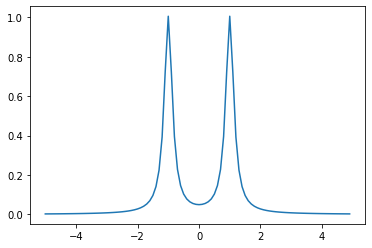

In [ ]:

pi=np.pi
def s(t):
    return np.exp(-np.abs(t))*np.cos(2*pi*t)
def S(f):
    return 1/(1+4*np.pi**2*(f-1)**2)+1/(1+4*np.pi**2*(f+1)**2)

f=np.arange(-5,5,0.1)
plt.plot(f,S(f))
plt.show()

/opt/python/envs/default/lib/python3.8/site-packages/matplotlib/cbook/__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)



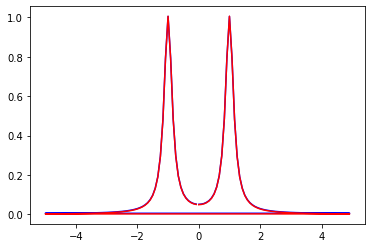

In [ ]:
Te=0.1
t=np.arange(-6,6,Te)
N=len(t)-1
y=np.fft.fftshift(s(t))
Y=np.fft.fft(y)*Te
freq = np.fft.fftfreq(N+1,Te)
plt.plot(freq,Y,color='b')
plt.plot(freq,S(freq),color='r')
plt.show()

# Signal périodique
Considérer le signal $x$ suivant: $t\mapsto x(t)=2\cos(4\pi t)+3\cos(8\pi t)$
<ol>
<li> Quelle est sa période que l'on note $T$?
</ol>

$$T=\frac 12$$

<ol start=2>
<li> Écrire le signal $x(t)$ sous forme exponentielle (formule d'Euler!). En déduire les coefficients de Fourier de $x(t)$. 
</ol>

$$ x(t) = \frac 32 e^{-8\pi t}+e^{-4\pi t}+e^{4\pi t}+\frac 32 e^{8\pi t} $$
D'où 
$$c_n=\left\{\begin{array}{ll} 1 & \mbox{ si } n=\pm 2 \\ \frac 32 & \mbox{ si } n=\pm 4 \\ 0 & \mbox{ sinon}  \end{array} \right.$$ 

<ol start=3>
<li> On définit $\tilde{x}:n\mapsto \tilde{x}[n]=x(t_n)$ le signal en temps discret résultant de l'échantillonnage de $x$ à la fréquence $f_e=8$ Hz. Quel est le pas de discrétisation correspondant à une telle fréquence?
</ol>

$$Te=\frac 1{f_e}$$

<ol start=4>
<li> Calculer le nombre d'échantillons $N$ sur une période en fonction de $T$ et $f_e$.
</ol>

$$N=fe\times T$$

<ol start=5>
<li> Dessiner sur le même graphique la fonction $x(t)$ sur l'intervalle $[0,T]$ et le signal précédent $\tilde{x}[n]$ tronqué à $N$ échantillons correspondant aux temps $t_n$, $n=0,...,N-1$. On utilisera les deux fonctions python: <b> plot</b> et <b> stem</b>  de la bibliothèque <b> matplotlib.pyplot</b> .
</ol>

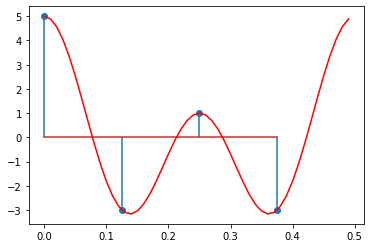

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from numpy.fft import *
pi=np.pi

def x(t):
    return 2*np.cos(4*pi*t)+3*np.cos(8*pi*t)
T=1/2
fe=8
Te=1/fe
N=int(fe*T)
tk=np.arange(0,T,Te)
plt.stem(tk,x(tk))
t=np.arange(0,T,0.01)
plt.plot(t,x(t),color='r')
plt.show()

<ol start=6>
<li> Calculer et tracer la transformée de Fourier discrète (TFD) du signal évalué aux temps $t_n$, $n=0,...,N-1$. Comparer avec le spectre de la question 2.
</ol>

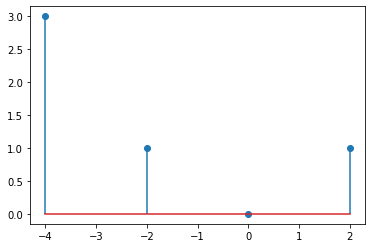

In [ ]:
s=x(tk)
S=fft(s)/N
f=fftfreq(N,Te)
plt.stem(f,np.real(S))
plt.show()

On ne retrouve pas exactement le même spectre que celui de la question 2.

<ol start=7>
<li> Refaire les questions 4 et 5 pour $fe=10, 12, 20, ...$
</ol>

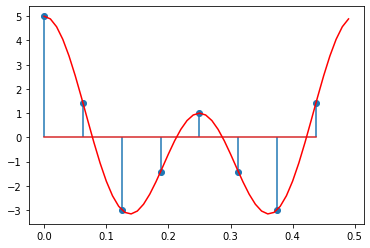

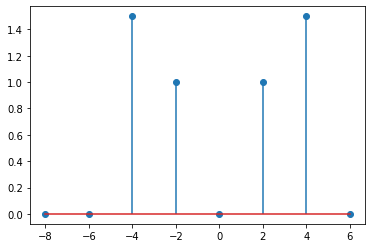

In [ ]:
fe=16
Te=1/fe
N=int(fe*T)
tk=np.arange(0,T,Te)
plt.stem(tk,x(tk))
t=np.arange(0,T,0.01)
plt.plot(t,x(t),color='r')
plt.show()
s=x(tk)
S=fft(s)/N
f=fftfreq(N,Te)
plt.stem(f,np.real(S))
plt.show()

On retrouve bien le même spectre que celui de la question 2.

# Décalage fréquentiel
Soit $x$ le signal continu défini par $x(t)=\frac{1}{1+t^2}$. Illustrer la propriété de décalage fréquentiel de la TF en représentant le module de la TF de
$$x(t) \times e^{i2\pi f_0t}$$
avec $f_0=20$ Hz. Représenter le module, la partie réelle et la partie imaginaire du signal temporel.

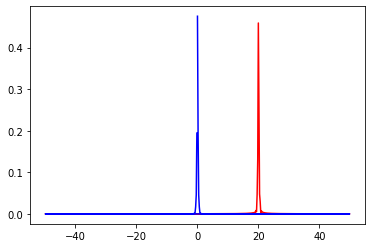

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from numpy.fft import *
pi=np.pi
a=5
def x(t):
    return 1/(1+t**2)

def s(t):
    return x(t)*np.exp(2*1j*pi*20*t)

Te=0.01

t=np.arange(-a/2,a/2+Te,Te)
N=len(t)
sn=s(t)
xn=x(t)
s_shift=fftshift(sn)
x_shift=fftshift(xn)
S=fft(s_shift)/N
X=fft(x_shift)/N
f = fftfreq(N,Te)
plt.plot(f, np.abs(S),color='r')
plt.plot(f, np.abs(X),color='b')
plt.show()